<a href="https://www.kaggle.com/code/tompaulat/preprocessing-image-data-using-opencv?scriptVersionId=108450074" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Preprocessing Images of Modern Architecural Building

## Outline
- Image Load-In 
- Preprocessing using OpenCV
- Saving Preprocessed Images

# Image Load-In 

We will load in the pictures from the large [database on modern architecture](https://www.kaggle.com/datasets/tompaulat/modernarchitecture) and use OpenCV to preprocess the images. In the process we will create a [smaller database](https://www.kaggle.com/datasets/tompaulat/modern-architecture-100k-small-images) of square images (128x128pixels). This descreased the size of the Database from 8GB to 800MB, therefore being more easily applicable for smaller scale projects.

In [1]:
# Imports
import os
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import pandas as pd 
import numpy as np
import plotly.express as px


# Creating a Dataframe of Images

In [2]:
heights = []
widths = []
names = []
im_array = []
subfolders = ['0-B', 'C-E', 'F-H', 'I-K', 'L-N', 'O-Q', 'R-T', 'U-W', 'X-Z']
number = np.arange(len(subfolders))
# Here we just choose a subfolder, i.e. 'X-Z' with index 8
index = number[8]
# for t in Tags:
for dirname, _, filenames in os.walk(f'/kaggle/input/modernarchitecture/Public Buildings/Public Buildings/{subfolders[index]}'):
    counter = 0
    for filename in filenames:   
        counter += 1
        try:
            im = cv.imread(os.path.join(dirname, filename))
            im_array.append(im)
            heights.append(im.shape[0])
            widths.append(im.shape[1])
            names.append(filename)
        except:
            pass

# Creating a dataframe which saves the filenames, heights, widhts and image array
df = pd.DataFrame({'name':names, 'height':heights, 'width':widths, 'im_array':im_array})

# Basic Open CV Image Transformations

Lets load in an example image and perform some explore some image transformations using [openCV](https://docs.opencv.org/3.4/db/df6/tutorial_erosion_dilatation.html)

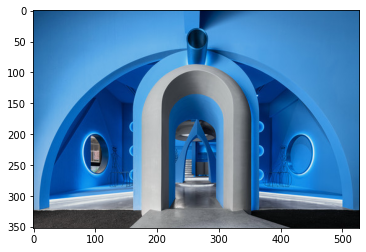

In [3]:
img = df.im_array.loc[256]
plt.imshow(img)

### Blurring the Image

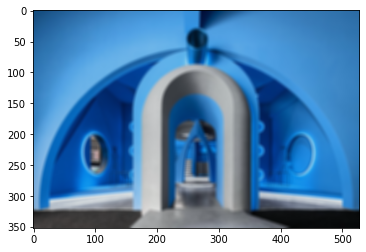

In [4]:
blur = cv.GaussianBlur(img, (7,7), cv.BORDER_DEFAULT)
plt.imshow(blur)

### Canny Edge Detection

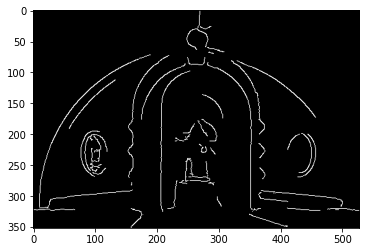

In [5]:
canny = cv.Canny(blur, 125, 175)
plt.imshow(canny, cmap='Greys_r')

### Image Dilation

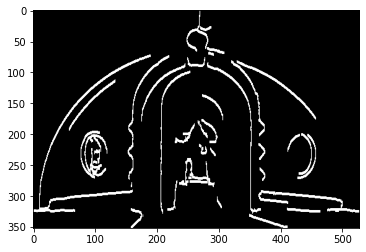

In [6]:
dilated = cv.dilate(canny, (7,7), iterations=3)
plt.imshow(dilated, cmap='Greys_r')

### Resizing an Image

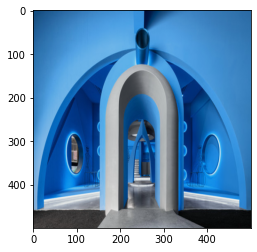

In [7]:
# Resizing the image ignoring aspect ratio 
resized = cv.resize(img, (500, 500), interpolation=cv.INTER_AREA)
plt.imshow(resized)

### Cropping an Image

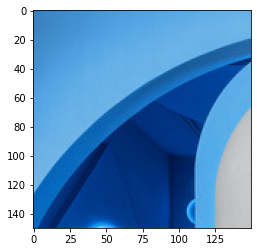

In [8]:
cropped = img[50:200, 50:200]
plt.imshow(cropped)

We want to unify the images. Lets therefore look at how Heights and Widths of the Images are Distributed

## Distribution of Image Heights and Widths in the Dataset

<AxesSubplot:xlabel='width', ylabel='Count'>

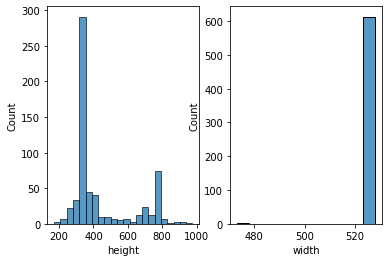

In [9]:
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(df.height, ax=ax1, label='heights')
sns.histplot(df.width, ax=ax2, label='Widths')

In [10]:
# lets for simplicity only take in values with width 528 and heihgt in [300px, 850px]
df_new = df.query('850 > height > 300')

## Plotting the Distribution of Image Heights and Widths Ignoring Very Broad/Slim Pictures

<AxesSubplot:xlabel='width', ylabel='Count'>

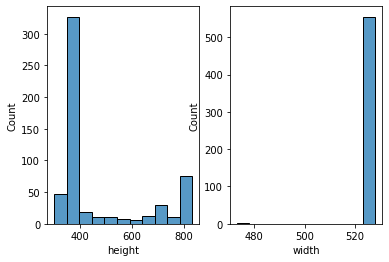

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(df_new.height, ax=ax1, label='heights')
sns.histplot(df_new.width, ax=ax2, label='widths')

# Transforming all the Image into Square Images (128px by 128px)

In [12]:
#let make all these images to square images 
cropped = []
for i, _ in df.iterrows():
    if df.height[i] < df.width[i]:
        cropped.append(cv.resize(df.im_array[i][:, :df.height[i]], (128,128), interpolation=cv.INTER_AREA))
    elif df.height[i] > df.width[i]:
        cropped.append(cv.resize(df.im_array[i][:df.width[i], :], (128,128), interpolation=cv.INTER_AREA))
    else:
        cropped.append(cv.resize(df.im_array[i], (128,128), interpolation=cv.INTER_AREA))
        
df['cropped'] = cropped

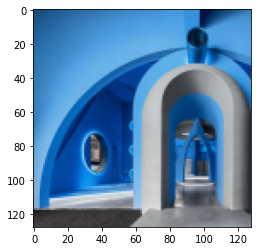

In [13]:
# Lets look at the Example from above
img = df.cropped.loc[256]
plt.imshow(img)

# Downloading the Imagefiles

In [14]:
# Creating a folder in the working directory
os.makedirs(f'/kaggle/working/ResizedImages{subfolders[index]}')

In [15]:
# Save images from the dataframe to the working directory 
for i, _ in df.iterrows():
    img = df.cropped.loc[i]
    cv.imwrite(f"./ResizedImages{subfolders[index]}/{df.name[i]}", img)

In [16]:
# Zip the directory to be easily downloadable
import shutil
shutil.make_archive(f'ResizedImages{subfolders[index]}', 'zip', f'./ResizedImages{subfolders[index]}')

'/kaggle/working/ResizedImagesX-Z.zip'

The above shown method was repeated for all subfolders of thus creating the [smaller database](https://www.kaggle.com/datasets/tompaulat/modern-architecture-100k-small-images).

# Image Examples



Lets now Load-In all the smaller Images and Plot some of them.

In [17]:
# Setting a seed 
np.random.seed(seed=42)

In [18]:
appart_path = '../input/modern-architecture-100k-small-images/Dataset_128px_128px_Images/Appartments'
public_build_path = '../input/modern-architecture-100k-small-images/Dataset_128px_128px_Images/Public_Buildings'


appart_files = [f for f in os.listdir(appart_path)]
public_build_files = [f for f in os.listdir(public_build_path)]


# Lets select 100 files at random  
random_appartments = np.random.choice(appart_files, 101)
random_public_build = np.random.choice(public_build_files, 101)


### 100 Random Appartments

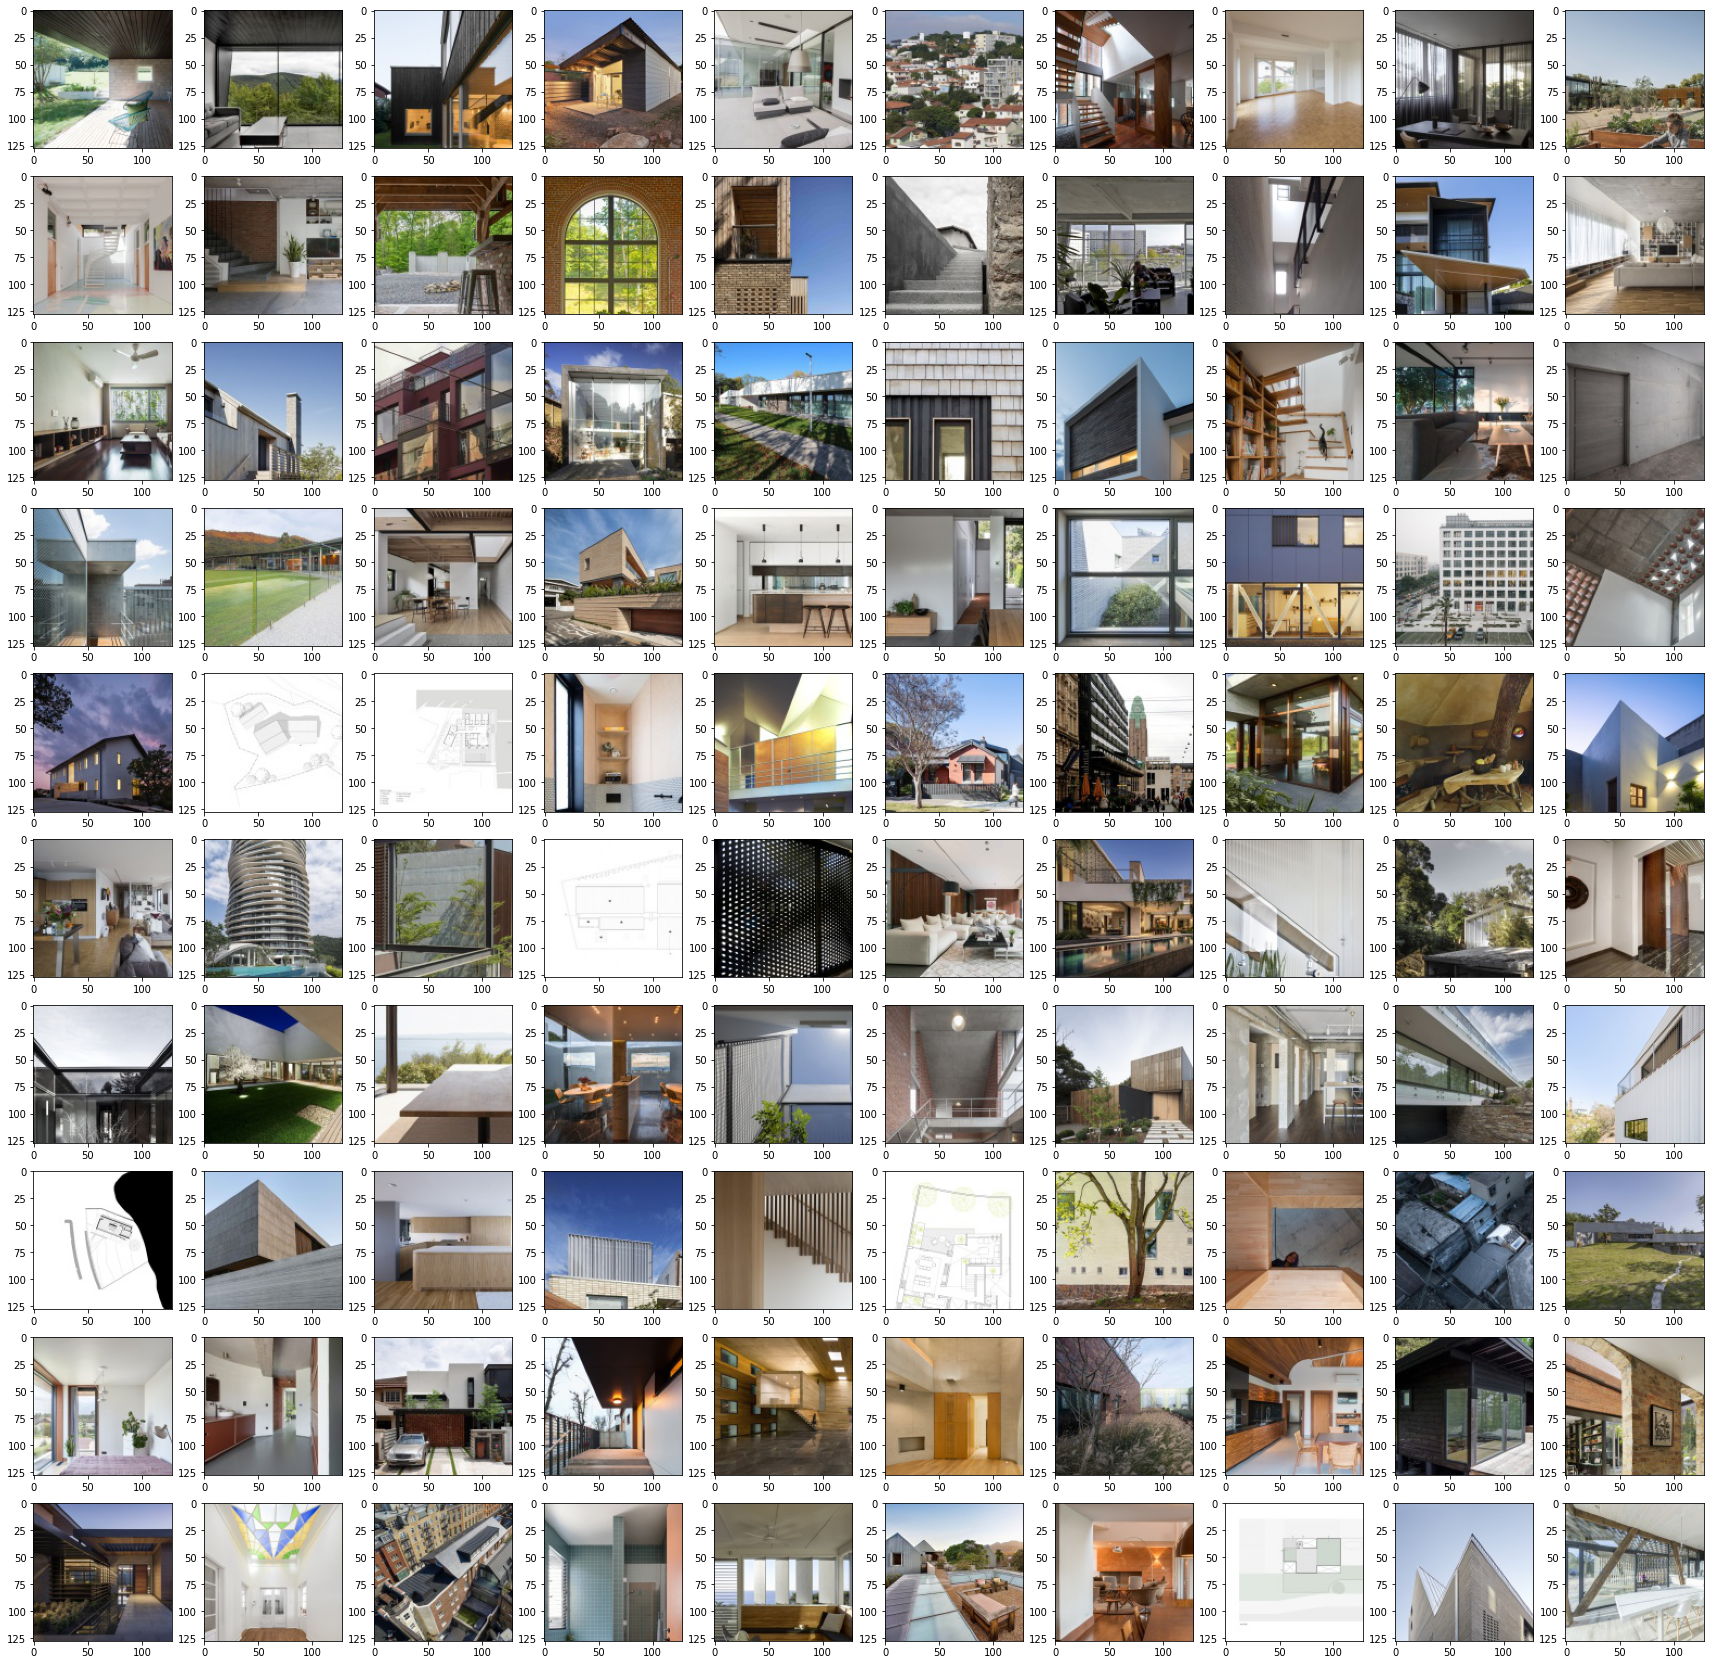

In [19]:
w = 10
h = 10
fig = plt.figure(figsize=(30, 30))
columns = 10
rows = 10
for i in range(1, columns*rows +1):
    img = plt.imread(appart_path + '/' + random_appartments[i])   
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

## 100 Random Public Builings

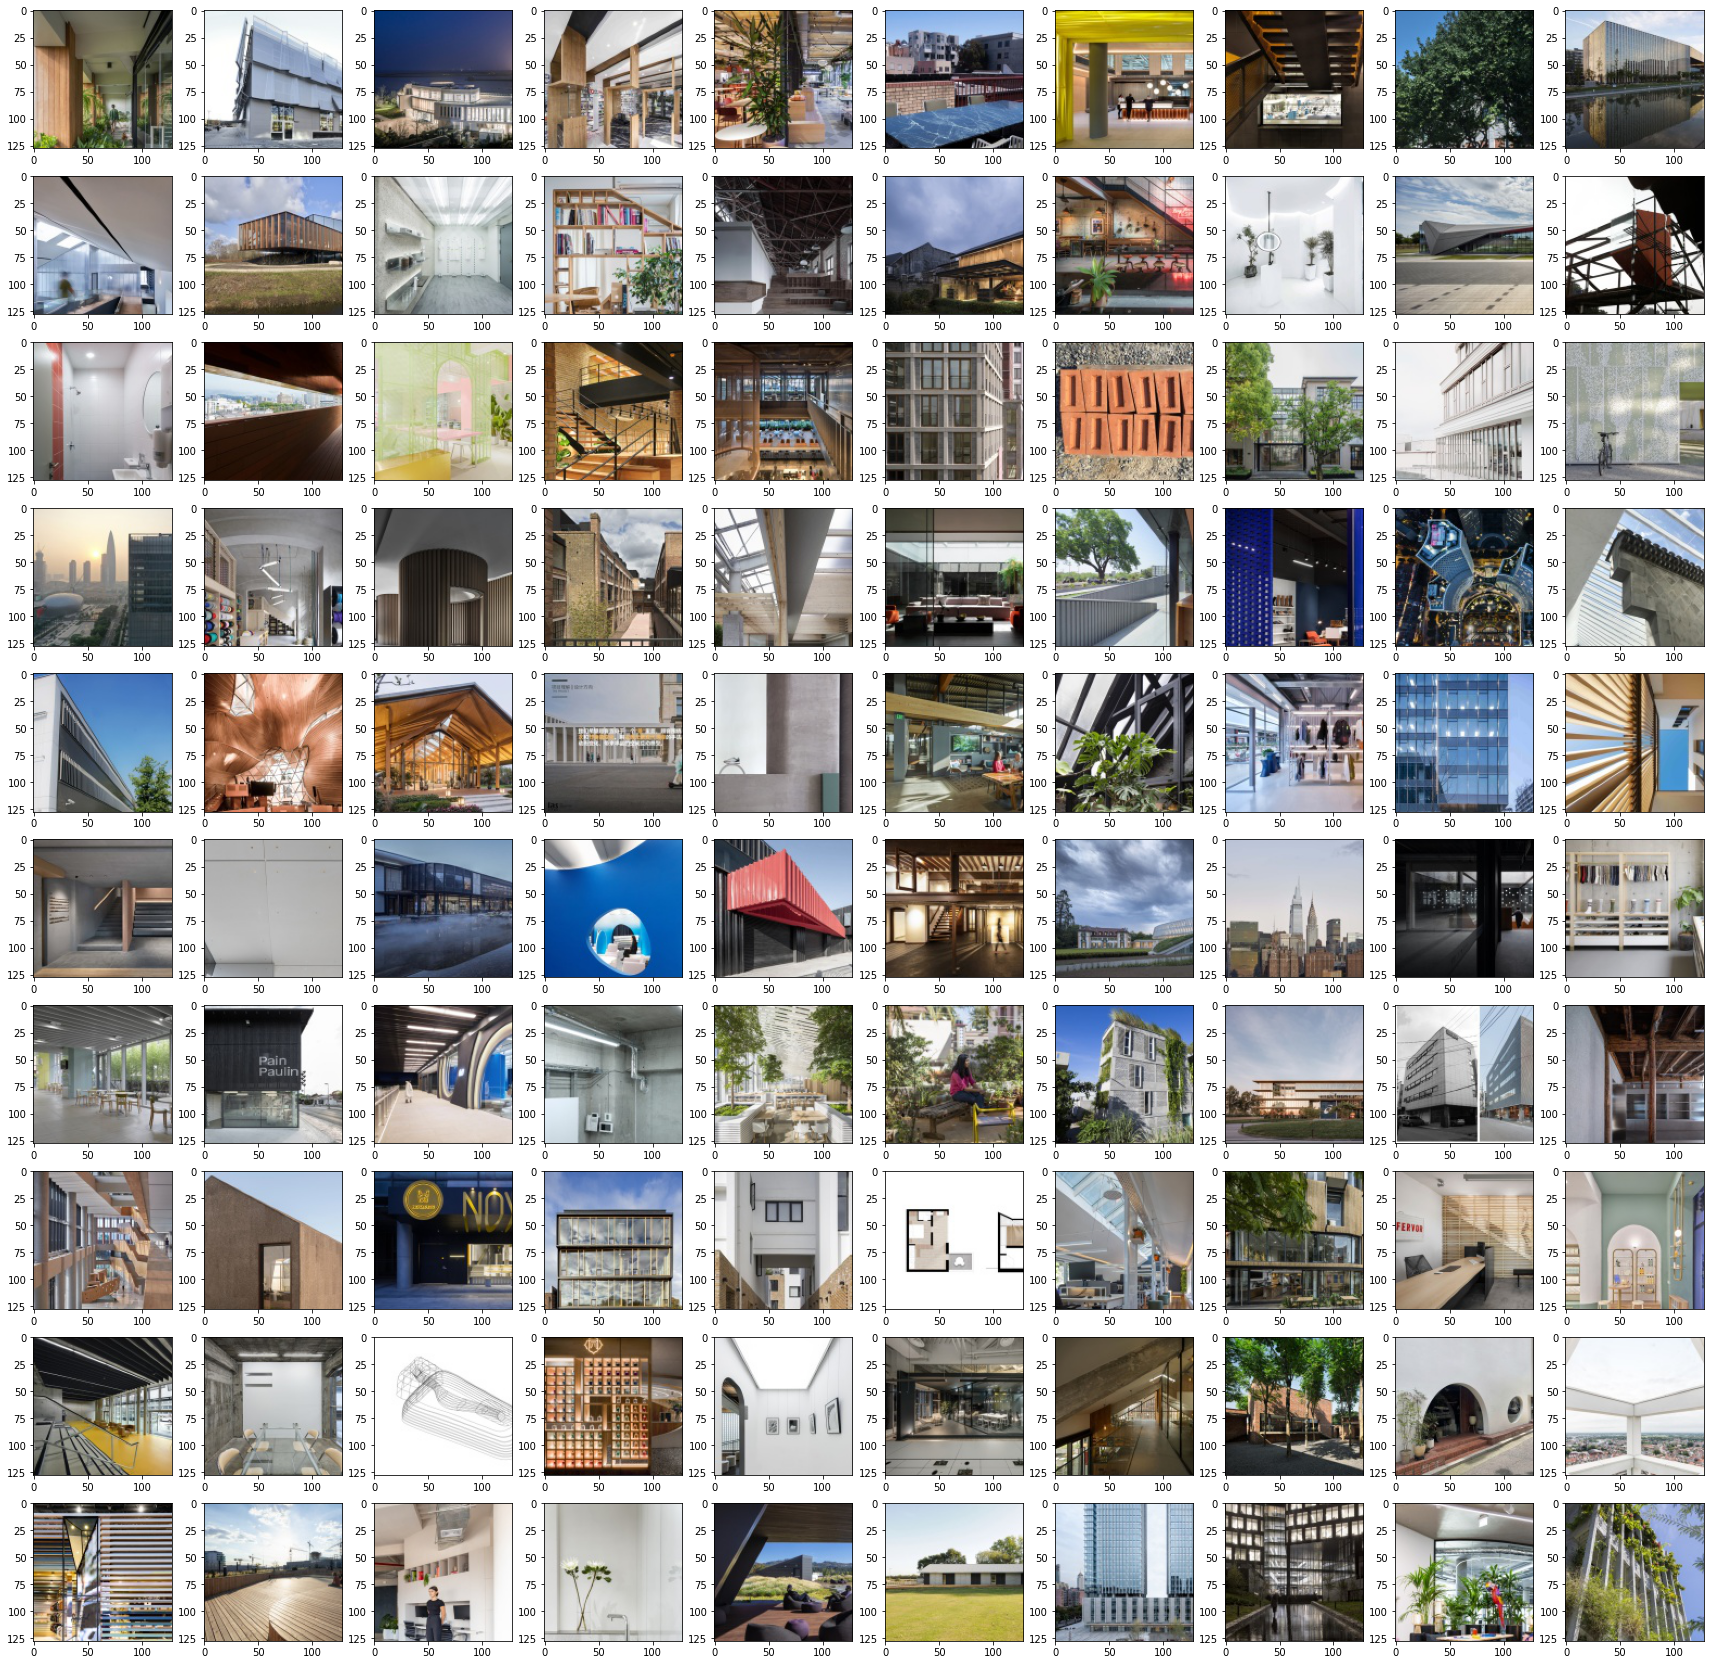

In [20]:
w = 10
h = 10
fig = plt.figure(figsize=(30, 30))
columns = 10
rows = 10
for i in range(1, columns*rows +1):
    img = plt.imread(public_build_path + '/' + random_public_build[i])   
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

It is easily seen that there are a diverse range of images including:
* Interior Photography
* Exterior Photography
* Architectural Drawings 